In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/content/drive/MyDrive/final/data/"
SEED = 42

In [ ]:
reset_seeds(SEED)

In [ ]:
df = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어 (1).csv")
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.4 MB/s eta 0:00:00


# Okt

In [ ]:
from gensim import corpora, models
from konlpy.tag import Okt
import re
import pyLDAvis.gensim
import pyLDAvis

stopwords = ['이', '그', '저', '것', '들', '등', '을', '를', '에', '와', '과', '의', '로', '으로', '만', '에서', '게', '으로써',
             '처럼', '하고', '도', '면', '못', '좋', '같아요', '네요', '는데', '다가', '아요', '어요', '습니다', '면서', '많이', '너무',
             '정말', '듯', '때', '고', '게다가', '죠', '거든요', '요', '인데', '더', '해', '해서', '든', '뭐', '하며', '된', '걸', '좀',
             '주', '거', '몇', '또', '한', '되', '같', '보이', '나', '이나', '대', '하', '잘', '되어', '아', '했', '건', '해도', '해보',
             '했어', '하    는', '한다', '하면', '해야', '하게', '하자', '하세', '하고', '하느', '하려', '하였', '하면', '하겠', '하셔', '하십',
             '하세요', '하다가', '사용', '제품', '구매', '피부', '느낌', '효과', '가격', '만족', '구입', '배송', '용량', '가격', '행사', '항상',
             '구매', '사용', '제품', '처음', '계속', '조금', '생각', '보고', '정도']

# 텍스트 전처리
def text_preprocessing(text):
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\s]', '', text)
    okt = Okt()
    text = okt.nouns(text)
    text = [word for word in text if word not in stopwords]
    return text

# 텍스트 전처리
df['리뷰_전처리'] = df['리뷰'].apply(text_preprocessing)

In [ ]:
df['리뷰_전처리']

In [ ]:
# Create a Gensim dictionary from the processed text
dictionary = corpora.Dictionary(df['리뷰_전처리'])

# Create a document-term matrix (corpus)
corpus = [dictionary.doc2bow(text) for text in df['리뷰_전처리']]

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [ ]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

In [ ]:
# 시각화
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, "lda.html")

# kiwi

In [ ]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 65.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=cb4c79c093813b5bf27f1253bd8a1049ea7adb6e6ad6f5d26cedfcdd57db0a32
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [ ]:
import re
train_review = []
for review in df['리뷰']:
    pat = re.compile("[^a-zA-Z가-힣ㄱ-ㅎ0-9]")
    result = pat.sub(" ",review)
    result = re.sub(" +", " ", result)
    train_review.append(result)

train_review

['남편이 극지성이에요 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라길래 각지제거 성분도 있다길래 바꿔봤어요 오늘 받자마자 사용해보라고 했는데 전 제품이랑 향이랑 사용감 모두 비슷해서 차이를 모르겠데요 조금 더 사용해 보고 한 달 후기 남길게요 수퍼화산송이도 엄청 만족하면서 사용했던 제품이라 이것도 만족스럽긴 하답니다 ',
 '여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 세안 해주면 좋은점이 뾰루지가 안나고 뽀드득하게 씻겨줘서 좋아요 세안 브러쉬에 적당하게 손마디 하나로 짜준다음 물을 묻히고 피부결 따라 거품으로 구석구석 닦아주면 좋답니다 ',
 '이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써서 세안하는데 세안후에도 당기는느낌이 많이 없어서 만족스럽네요 용량도 적당하고 패키지도 깔끔해서 욕실에두기도 좋아요 재구매의사 있습니다 ',
 '저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1 1 이벤트하길래 4개 쟁였어요 조금만 써도 거품도 잘나고 씻고 나서 남는 느낌도 없으면서 많이 건조하지도 않아서 좋아요 전에 쓰던거랑 케이스가 달라졌던데 내용물은 똑같았으면 좋겠네요 ',
 '여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 더 좋아요 피부 트러블도 일어나지 않아서 더 맘에 들어요 피부가 완전 촉촉해서 맘에 들어요 가족 모두 사용할수 있어요 각질제거 효과도 있어서 참 좋으네요 이번에 세일해서 여러개 구매했어요 ',
 '이니스프리 화산송이 모공 바하 클렌징폼을 구입해봤어요 이니스프리 화산송이 제품이 유명해서 클렌징폼 말고 다른 팩을 사용해봤었는데 꽤 만족해서 이번에는 요제품을 구입해봤는데 피부에 자극이 없는건 아니지만 격일로 쓰기에 좋은거같아요 겨울보다는 여름에 유용할 것 같습니다',
 '기한25년까지라 유효기간 넉넉하고 제품용량은 150g이에요 보통대용량을 사는데 클렌징폼은 한번쓸때 소량만 쓰기때문에 딱좋다고생각해요 거품도 잘 나구요 

In [ ]:
import kiwipiepy
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
stopwords =  Stopwords()
kiwi = Kiwi()

In [ ]:
train_text = [str(item) for item in train_review]

In [ ]:
train_kiwi_words =[]

for idx,text in enumerate(train_text):
    result = kiwi.tokenize(text,stopwords=stopwords)
    tmp = [token.form for token in result if token.tag in ['NNG','NNP','VA','XR']] # 일반명사, 고유명사, 형용사, 어근
    train_kiwi_words.append(tmp)

In [ ]:
train_kiwi_words

[['남편',
  '극지',
  '수퍼',
  '화산',
  '송이',
  '미세',
  '사용',
  '지성',
  '전용',
  '각지',
  '제거',
  '성분',
  '사용',
  '제품',
  '향',
  '용감',
  '비슷',
  '차이',
  '사용',
  '후기',
  '수퍼화',
  '송이',
  '만족',
  '사용',
  '제품',
  '만족'],
 ['여름',
  '집',
  '메이크업',
  '클렌징',
  '이중',
  '세안',
  '폼',
  '클렌징',
  '세안',
  '좋',
  '점',
  '뾰루지',
  '좋',
  '세안',
  '브러쉬',
  '적당',
  '손마디',
  '다음',
  '물',
  '피부',
  '결',
  '거품',
  '구석구석',
  '좋'],
 ['이니스프리',
  '폼',
  '클렌징',
  '피부',
  '자극',
  '좋',
  '선',
  '크림',
  '사용',
  '폼',
  '세',
  '세안',
  '후',
  '느낌',
  '만족',
  '용량',
  '적당',
  '패키지',
  '깔끔',
  '욕실',
  '좋',
  '구매',
  '의사',
  '있'],
 ['엄마',
  '제품',
  '클렌징',
  '이벤트',
  '조금',
  '거품',
  '느낌',
  '건조',
  '좋',
  '전',
  '케이스',
  '내용물',
  '똑같',
  '좋'],
 ['여름',
  '모공',
  '넓',
  '구매',
  '사용',
  '촉촉하',
  '피부',
  '좋',
  '피부',
  '트러블',
  '맘',
  '피부',
  '촉촉하',
  '맘',
  '가족',
  '사용',
  '있',
  '각질',
  '제거',
  '효과',
  '있',
  '좋',
  '이번',
  '세일',
  '구매'],
 ['이니스프리',
  '화산',
  '송이',
  '모공',
  '바하',
  '클렌징',
  '폼',
  '구입',
  '이니스프리',
  '화산',
  '송이',
  

# bag of words

In [ ]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=6b47762b9c5a17648b57b8d13b84e69e6a6875d6e7b908e2ee86855bd4f17d97
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
from gensim import corpora, models
from konlpy.tag import Okt
import re
import pyLDAvis.gensim
import pyLDAvis

In [ ]:
# Create a Gensim dictionary from the processed text
dictionary = corpora.Dictionary(train_kiwi_words)

# Create a document-term matrix (corpus)
corpus = [dictionary.doc2bow(text) for text in train_kiwi_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# CoherenceModel을 통한 토픽 최적화

In [ ]:
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=train_kiwi_words, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.4825544831885248,
 0.48646417224544763,
 0.4914579304634431,
 0.5305247251703644,
 0.5258175374940338,
 0.5252981464624896,
 0.5203740136693797,
 0.5214400113231389,
 0.5243277244621897,
 0.5390389167724335,
 0.542299454191026,
 0.5205826416416733,
 0.5303521993116294]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


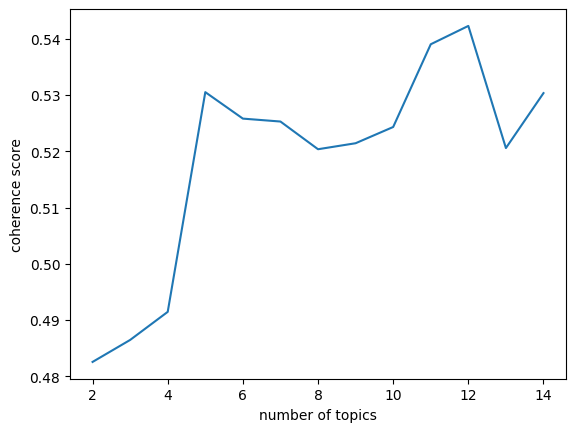

In [ ]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
def find_optimal_num_topics(dictionary, corpus, texts, limit=20):
    coherence_values = []
    model_list = []
    for num_topics in range(1, limit + 1):
        # LDA 모델 생성
        model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        # 응집도 계산
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def plot_coherence(coherence_values, limit=20):
    x = range(1, limit + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(x, coherence_values, marker='o')
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score vs. Number of Topics")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


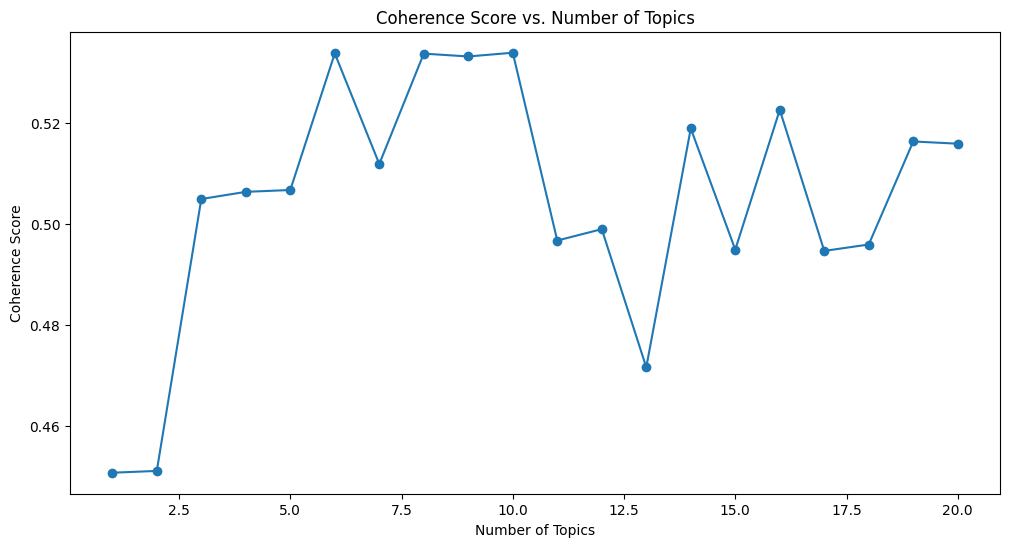

The optimal number of topics is 10


In [ ]:
model_list, coherence_values = find_optimal_num_topics(dictionary, corpus, train_kiwi_words)
plot_coherence(coherence_values)
optimal_num_topics = coherence_values.index(max(coherence_values)) + 1  # 토픽이 1부터 시작하므로 +1
print(f"The optimal number of topics is {optimal_num_topics}")

# 모델링

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.107*"좋" + 0.095*"사용" + 0.092*"피부" + 0.036*"제품" + 0.033*"순하" + 0.030*"촉촉하" + 0.029*"자극" + 0.026*"촉촉" + 0.024*"후" + 0.023*"향"')
(1, '0.176*"팩" + 0.147*"마스크" + 0.050*"모공" + 0.036*"미스트" + 0.031*"각질" + 0.019*"두피" + 0.019*"제거" + 0.018*"유스" + 0.013*"로터스" + 0.013*"분사"')
(2, '0.069*"피부" + 0.030*"에센스" + 0.029*"느낌" + 0.022*"탄력" + 0.022*"앰프" + 0.019*"있" + 0.018*"앰플" + 0.018*"체험" + 0.015*"효과" + 0.014*"흡수"')
(3, '0.088*"좋" + 0.056*"크림" + 0.049*"향" + 0.038*"수분" + 0.035*"사용" + 0.031*"건조" + 0.030*"피부" + 0.023*"제품" + 0.021*"느낌" + 0.021*"촉촉"')
(4, '0.070*"좋" + 0.067*"선물" + 0.063*"배송" + 0.059*"빠르" + 0.025*"패키지" + 0.025*"포장" + 0.023*"향" + 0.023*"포인트" + 0.023*"예쁘" + 0.023*"고급"')
(5, '0.088*"클렌징" + 0.052*"티슈" + 0.043*"사용" + 0.039*"세안" + 0.036*"폼" + 0.033*"오일" + 0.031*"좋" + 0.030*"거품" + 0.027*"제품" + 0.025*"후"')
(6, '0.062*"사용" + 0.051*"효과" + 0.031*"진정" + 0.030*"주름" + 0.026*"피부" + 0.024*"제품" + 0.021*"트러블" + 0.018*"구매" + 0.016*"있" + 0.014*"고민"')
(7, '0.110*"스킨" + 0.081*"라인" + 0.077*"크림" + 0.073*"로션" + 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 시각화

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, "lda.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
